In [6]:
pip install datascience geopandas geohash2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15554 sha256=1be8b9596c5dd25d328a07aeb97995152ebcb89107982b1aceb75a00c8f9ec71
  Stored in directory: c:\users\202973\appdata\local\pip\cache\wheels\97\82\cd\50d2f4984c45d96c316d77f799a099fdb6be3ad355297af3c5
Successfully built geohash2
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Traffic & Air Quality Analysis Using datascience + GeoPandas + DBSCAN + Geohashing

# STEP 1: Import libraries
# ----------------------------------------
# Import all necessary libraries for data handling, spatial analysis, plotting, and clustering
from datascience import Table
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import geohash2
import glob

In [18]:
%matplotlib inline


In [33]:
# STEP 2: Load and combine AIR QUALITY data from multiple CSVs
# ----------------------------------------
# Combine all air quality data parts into one DataFrame
files = sorted(glob.glob("chicago_eclipse_data_part_*.csv"))
aq_df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
print(aq_df.columns)

Index(['City', 'DeviceId', 'LocationName', 'Latitude', 'Longitude',
       'ReadingDateTimeUTC', 'PM25', 'CalibratedPM25', 'CalibratedO3',
       'CalibratedNO2', 'CO', 'Temperature', 'Humidity', 'BatteryLevel',
       'PercentBattery', 'CellSignal'],
      dtype='object')


In [32]:
aq_df

,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,geohash,taxi_pickup_count
0,41.794921,-87.625857,2021-06-30 00:01:33,0.870864,7.01,25.86,2.83,0.215033,dp3ty0,5362
1,41.794921,-87.625857,2021-06-30 00:06:43,1.512727,7.35,25.62,3.29,0.224233,dp3ty0,5362
2,41.794921,-87.625857,2021-06-30 00:11:53,3.797307,9.26,26.26,3.51,0.246595,dp3ty0,5362
3,41.794921,-87.625857,2021-06-30 00:17:03,2.158962,8.46,25.32,7.05,0.313020,dp3ty0,5362
4,41.794921,-87.625857,2021-06-30 00:22:13,3.170227,9.91,24.79,6.69,0.328050,dp3ty0,5362
...,...,...,...,...,...,...,...,...,...,...
2426680,41.903627,-87.643443,2021-08-20 11:55:10,17.235613,15.85,22.52,13.78,0.407807,dp3wms,0
2426681,41.903627,-87.643443,2021-08-20 12:00:20,11.742577,14.20,20.00,12.48,0.382384,dp3wms,0
2426682,41.903627,-87.643443,2021-08-20 12:05:30,13.482563,14.78,21.90,13.01,0.385963,dp3wms,0
2426683,41.903627,-87.643443,2021-08-20 12:10:39,10.450826,15.47,19.72,13.55,0.438555,dp3wms,0


In [14]:
df_subset = aq_df[['Latitude', 'Longitude', 'CalibratedPM25']]
print(df_subset.columns)
df_subset

Index(['Latitude', 'Longitude', 'CalibratedPM25'], dtype='object')


,Latitude,Longitude,CalibratedPM25
0,41.794921,-87.625857,NaN
1,41.794921,-87.625857,NaN
2,41.794921,-87.625857,NaN
3,41.794921,-87.625857,NaN
4,41.794921,-87.625857,NaN
...,...,...,...
2461084,41.903627,-87.643443,15.85
2461085,41.903627,-87.643443,14.20
2461086,41.903627,-87.643443,14.78
2461087,41.903627,-87.643443,15.47


In [15]:
# Drop rows with missing or zero values
df_subset = df_subset.dropna()
df_subset = df_subset[df_subset['CalibratedPM25'] > 0]
df_subset

,Latitude,Longitude,CalibratedPM25
24198,41.794921,-87.625857,7.01
24199,41.794921,-87.625857,7.35
24200,41.794921,-87.625857,9.26
24201,41.794921,-87.625857,8.46
24202,41.794921,-87.625857,9.91
...,...,...,...
2461084,41.903627,-87.643443,15.85
2461085,41.903627,-87.643443,14.20
2461086,41.903627,-87.643443,14.78
2461087,41.903627,-87.643443,15.47


In [16]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_subset[['Latitude', 'Longitude', 'CalibratedPM25']])


In [17]:
db = DBSCAN(eps=0.5, min_samples=10)  # Adjust eps and min_samples as needed
labels = db.fit_predict(coords_scaled)
df_subset['cluster'] = labels


MemoryError: 

In [3]:
aq_df = aq_df.drop(columns=[
    "City",
    "DeviceId",
    "LocationName",
    "Temperature",
    "Humidity",
    "BatteryLevel",
    "PercentBattery",
    "CellSignal"
])
print(aq_df.columns)

Index(['Latitude', 'Longitude', 'ReadingDateTimeUTC', 'PM25', 'CalibratedPM25',
       'CalibratedO3', 'CalibratedNO2', 'CO'],
      dtype='object')


In [4]:
aq_df

,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO
0,41.794921,-87.625857,2021-06-20 00:03:00,5.561094,NaN,NaN,NaN,0.123580
1,41.794921,-87.625857,2021-06-20 00:08:10,6.633914,NaN,NaN,NaN,0.132103
2,41.794921,-87.625857,2021-06-20 00:13:20,4.068707,NaN,NaN,NaN,0.131126
3,41.794921,-87.625857,2021-06-20 00:18:30,6.351702,NaN,NaN,NaN,0.138784
4,41.794921,-87.625857,2021-06-20 00:23:40,9.574065,NaN,NaN,NaN,0.413070
...,...,...,...,...,...,...,...,...
2461084,41.903627,-87.643443,2021-08-20 11:55:10,17.235613,15.85,22.52,13.78,0.407807
2461085,41.903627,-87.643443,2021-08-20 12:00:20,11.742577,14.20,20.00,12.48,0.382384
2461086,41.903627,-87.643443,2021-08-20 12:05:30,13.482563,14.78,21.90,13.01,0.385963
2461087,41.903627,-87.643443,2021-08-20 12:10:39,10.450826,15.47,19.72,13.55,0.438555


In [62]:
# Convert timestamp to datetime format
aq_df["ReadingDateTimeUTC"] = pd.to_datetime(aq_df["ReadingDateTimeUTC"], utc=True)

In [5]:
# STEP 3: Load TAXI data
# ----------------------------------------
# Load taxi trip data from a single file
taxi_df = pd.read_csv("taxi_data.csv")

# Keep only relevant columns
columns_to_keep = [
    "Trip Start Timestamp",
    "Trip End Timestamp",
    "Trip Seconds",
    "Trip Miles",
    "Pickup Centroid Latitude",
    "Pickup Centroid Longitude"
]

taxi_df = taxi_df[columns_to_keep]

print(taxi_df.columns)

Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude'],
      dtype='object')


In [9]:
taxi_df

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Centroid Latitude,Pickup Centroid Longitude
0,10/03/2021 08:30:00 PM,10/03/2021 09:00:00 PM,1584.0,18.07,41.877406,-87.621972
1,10/03/2021 08:30:00 PM,10/03/2021 09:00:00 PM,1606.0,16.60,41.979071,-87.903040
2,10/03/2021 08:30:00 PM,10/03/2021 08:45:00 PM,660.0,1.40,41.899602,-87.633308
3,10/03/2021 08:30:00 PM,10/03/2021 08:30:00 PM,498.0,3.45,41.980264,-87.913625
4,10/03/2021 08:30:00 PM,10/03/2021 08:45:00 PM,618.0,0.00,41.878866,-87.625192
...,...,...,...,...,...,...
2618446,01/01/2021 08:45:00 PM,01/01/2021 09:15:00 PM,1500.0,11.90,41.707311,-87.534903
2618447,01/01/2021 08:45:00 PM,01/01/2021 09:00:00 PM,807.0,4.21,41.953582,-87.723452
2618448,01/01/2021 08:45:00 PM,01/01/2021 09:00:00 PM,1260.0,0.00,41.792592,-87.769615
2618449,01/01/2021 08:45:00 PM,01/01/2021 09:15:00 PM,1320.0,8.90,41.835118,-87.618678


In [64]:
# Convert pickup and dropoff timestamps to datetime format
taxi_df["Trip Start Timestamp"] = pd.to_datetime(
    taxi_df["Trip Start Timestamp"],
    format="%m/%d/%Y  %I:%M:%S %p",
    utc=True
)
taxi_df["Trip End Timestamp"] = pd.to_datetime(
    taxi_df["Trip End Timestamp"],
    format="%m/%d/%Y  %I:%M:%S %p",
    utc=True
)

In [35]:
# Drop all rows with any NaN values in air quality data
aq_df = aq_df.dropna()
# Drop all rows with any NaN values in taxi data
taxi_df = taxi_df.dropna()


In [8]:
print("🔍 Null values in Air Quality Data:")
print(aq_df.isnull().sum())

print("🔍 Null values in Taxi Data:")
print(taxi_df.isnull().sum())

def null_report(df, name):
    print(f"🧾 Missing values in {name}:")
    nulls = df.isnull().sum()
    percent = (nulls / len(df)) * 100
    report = pd.DataFrame({"Null Count": nulls, "Percent": percent.round(2)})
    print(report[report["Null Count"] > 0])  # Show only columns with nulls
    print()

null_report(aq_df, "Air Quality Data")
null_report(taxi_df, "Taxi Data")

🔍 Null values in Air Quality Data:
Latitude              0
Longitude             0
ReadingDateTimeUTC    0
PM25                  0
CalibratedPM25        0
CalibratedO3          0
CalibratedNO2         0
CO                    0
dtype: int64
🔍 Null values in Taxi Data:
Trip Start Timestamp         0
Trip End Timestamp           0
Trip Seconds                 0
Trip Miles                   0
Pickup Centroid Latitude     0
Pickup Centroid Longitude    0
dtype: int64
🧾 Missing values in Air Quality Data:
Empty DataFrame
Columns: [Null Count, Percent]
Index: []

🧾 Missing values in Taxi Data:
Empty DataFrame
Columns: [Null Count, Percent]
Index: []



In [36]:
# Generate geohashes for air quality data
aq_df = aq_df.copy()
aq_df["geohash"] = aq_df.apply(
    lambda row: geohash2.encode(row["Latitude"], row["Longitude"], precision=6),
    axis=1
)

# Generate geohashes for taxi data
taxi_df = taxi_df.copy()
taxi_df["geohash"] = taxi_df.apply(
    lambda row: geohash2.encode(row["Pickup Centroid Latitude"], row["Pickup Centroid Longitude"], precision=6),
    axis=1
)

print("✅ Geohashes generated for both datasets.")
print("Example AQ geohashes:", aq_df["geohash"].unique()[:5])
print("Example Taxi geohashes:", taxi_df["geohash"].unique()[:5])


✅ Geohashes generated for both datasets.
Example AQ geohashes: ['dp3ty0' 'dp3wh3' 'dp3wh6' 'dp3ts0' 'dp3w7v']
Example Taxi geohashes: ['dp3wnp' 'dp3qzd' 'dp3wmg' 'dp3qz6' 'dp3wq5']


In [37]:
# Step 1: Count taxi pickups per geohash
taxi_counts = taxi_df['geohash'].value_counts().reset_index()
taxi_counts.columns = ['geohash', 'taxi_pickup_count']

# Step 2: Merge taxi pickup counts into air quality data on geohash
aq_df = aq_df.merge(taxi_counts, on='geohash', how='left')

# Step 3: Fill NaNs with 0 where no pickups exist in that geohash
aq_df['taxi_pickup_count'] = aq_df['taxi_pickup_count'].fillna(0).astype(int)


In [15]:
print(aq_df.columns)
aq_df

Index(['Latitude', 'Longitude', 'ReadingDateTimeUTC', 'PM25', 'CalibratedPM25',
       'CalibratedO3', 'CalibratedNO2', 'CO', 'geohash', 'taxi_pickup_count'],
      dtype='object')


,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,geohash,taxi_pickup_count
0,41.794921,-87.625857,2021-06-30 00:01:33,0.870864,7.01,25.86,2.83,0.215033,dp3ty0,5362
1,41.794921,-87.625857,2021-06-30 00:06:43,1.512727,7.35,25.62,3.29,0.224233,dp3ty0,5362
2,41.794921,-87.625857,2021-06-30 00:11:53,3.797307,9.26,26.26,3.51,0.246595,dp3ty0,5362
3,41.794921,-87.625857,2021-06-30 00:17:03,2.158962,8.46,25.32,7.05,0.313020,dp3ty0,5362
4,41.794921,-87.625857,2021-06-30 00:22:13,3.170227,9.91,24.79,6.69,0.328050,dp3ty0,5362
...,...,...,...,...,...,...,...,...,...,...
2426680,41.903627,-87.643443,2021-08-20 11:55:10,17.235613,15.85,22.52,13.78,0.407807,dp3wms,0
2426681,41.903627,-87.643443,2021-08-20 12:00:20,11.742577,14.20,20.00,12.48,0.382384,dp3wms,0
2426682,41.903627,-87.643443,2021-08-20 12:05:30,13.482563,14.78,21.90,13.01,0.385963,dp3wms,0
2426683,41.903627,-87.643443,2021-08-20 12:10:39,10.450826,15.47,19.72,13.55,0.438555,dp3wms,0


In [20]:
aq_df.sort_values("taxi_pickup_count",ascending=False)

,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,geohash,taxi_pickup_count
305476,41.871645,-87.669860,2021-08-25 15:29:30,8.953163,15.68,39.81,8.18,0.391517,dp3wjn,148311
1036719,41.871645,-87.669860,2021-09-23 17:06:24,1.253562,7.90,20.17,18.42,0.257695,dp3wjn,148311
1036743,41.871645,-87.669860,2021-09-23 19:10:25,3.232073,8.17,26.51,12.97,0.204365,dp3wjn,148311
1036744,41.871645,-87.669860,2021-09-23 19:15:35,6.342392,10.74,24.69,8.55,0.216969,dp3wjn,148311
1036745,41.871645,-87.669860,2021-09-23 19:20:45,3.455268,8.72,25.59,8.69,0.204566,dp3wjn,148311
...,...,...,...,...,...,...,...,...,...,...
1277736,41.743800,-87.605200,2021-10-03 05:04:54,2.346400,8.05,29.77,13.94,0.398612,dp3tqr,0
1277735,41.743800,-87.605200,2021-10-03 04:59:44,3.145102,5.87,34.06,6.38,0.176904,dp3tqr,0
1277734,41.743800,-87.605200,2021-10-03 04:54:34,4.612167,6.64,33.79,6.08,0.151020,dp3tqr,0
1277733,41.743800,-87.605200,2021-10-03 04:49:24,4.854040,8.19,28.86,9.75,0.212335,dp3tqr,0


In [25]:
num_unique = aq_df['geohash'].nunique()
print(f"Number of unique geohashes in air quality data: {num_unique}")


Number of unique geohashes in air quality data: 105


In [27]:
# Create a new DataFrame: one row per unique geohash
geohash_summary = aq_df[['geohash', 'taxi_pickup_count']].drop_duplicates(subset='geohash')

# Optional: Reset index for cleaner output
geohash_summary = geohash_summary.reset_index(drop=True)

# Show result
print(geohash_summary.head())
print(f"Unique geohashes: {geohash_summary.shape[0]}")
active_geohashes = geohash_summary[geohash_summary['taxi_pickup_count'] > 0]
print(f"Geohashes with taxi pickups > 0: {active_geohashes.shape[0]}")



  geohash  taxi_pickup_count
0  dp3ty0               5362
1  dp3wh3                  0
2  dp3wh6                  0
3  dp3ts0                  0
4  dp3w7v                  0
Unique geohashes: 105
Geohashes with taxi pickups > 0: 41


C:\Users\202973\AppData\Local\Temp\ipykernel_11388\2889567062.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pickup_filtered['LocationClean'] = pickup_filtered['LocationName'].str.replace(r'\s+\(.+\)', '', regex=True)


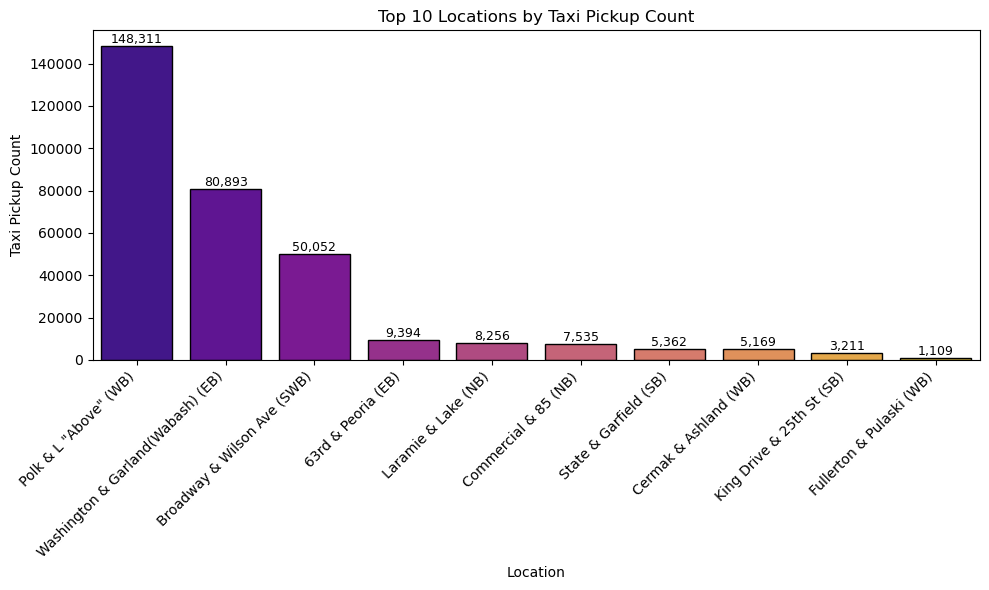

In [41]:
# Get one row per geohash with location name and taxi pickup count
neighborhood_summary = aq_df[['geohash', 'LocationName', 'taxi_pickup_count']].drop_duplicates(subset='geohash')
pickup_by_neighborhood = neighborhood_summary.groupby('LocationName')['taxi_pickup_count'].sum().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
# Filter neighborhoods with at least one taxi pickup
pickup_filtered = pickup_by_neighborhood[pickup_by_neighborhood['taxi_pickup_count'] > 0]
pickup_filtered['LocationClean'] = pickup_filtered['LocationName'].str.replace(r'\s+\(.+\)', '', regex=True)


top_n = 10
pickup_top = pickup_filtered.sort_values('taxi_pickup_count', ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=pickup_top,
    x='LocationName',
    y='taxi_pickup_count',
    palette='plasma'
)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.title(f"Top {top_n} Locations by Taxi Pickup Count")
plt.xlabel("Location")
plt.ylabel("Taxi Pickup Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [42]:
pollution_by_location = aq_df.groupby('LocationName')['CalibratedPM25'].mean().reset_index()
pollution_by_location.rename(columns={'CalibratedPM25': 'avg_pm25'}, inplace=True)
pickup_pollution = pickup_top.merge(pollution_by_location, on='LocationName', how='left')


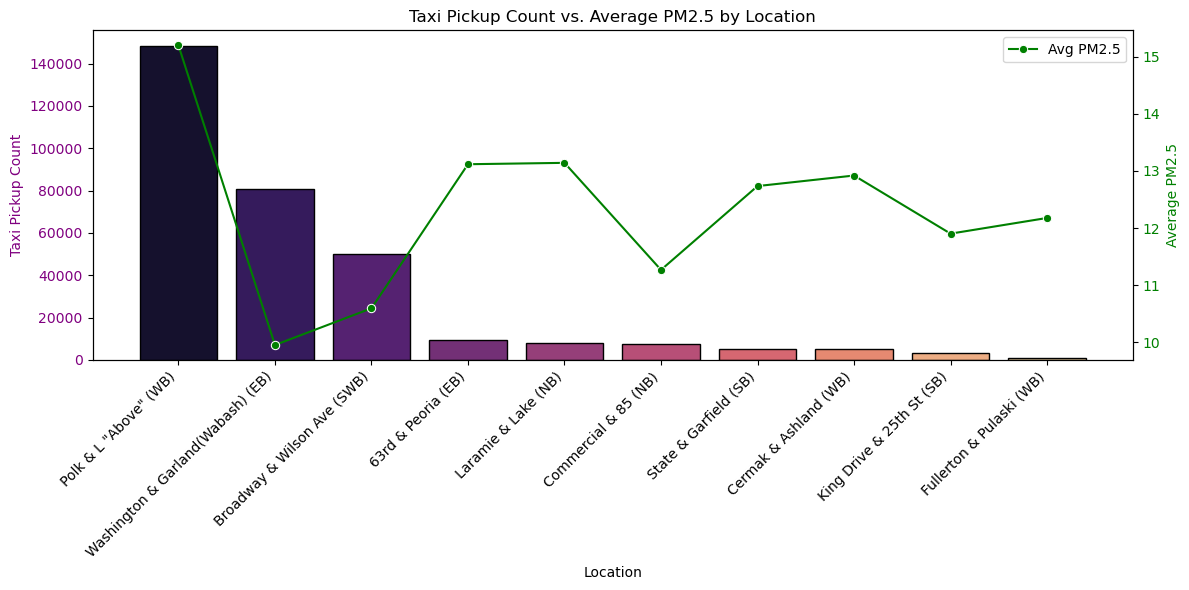

In [43]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot for taxi pickups
sns.barplot(
    data=pickup_pollution,
    x='LocationName',
    y='taxi_pickup_count',
    palette='magma',
    ax=ax1
)
ax1.set_ylabel("Taxi Pickup Count", color='purple')
ax1.set_xlabel("Location")
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_xticklabels(pickup_pollution['LocationName'], rotation=45, ha='right')

# Line plot for PM2.5 (secondary y-axis)
ax2 = ax1.twinx()
sns.lineplot(
    data=pickup_pollution,
    x='LocationName',
    y='avg_pm25',
    color='green',
    marker='o',
    ax=ax2,
    label='Avg PM2.5'
)
ax2.set_ylabel("Average PM2.5", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titles and layout
plt.title("Taxi Pickup Count vs. Average PM2.5 by Location")
fig.tight_layout()
plt.show()


In [44]:
correlation = pickup_pollution['taxi_pickup_count'].corr(pickup_pollution['avg_pm25'])
print(f"Pearson correlation between taxi pickups and PM2.5: {correlation:.3f}")


Pearson correlation between taxi pickups and PM2.5: 0.255


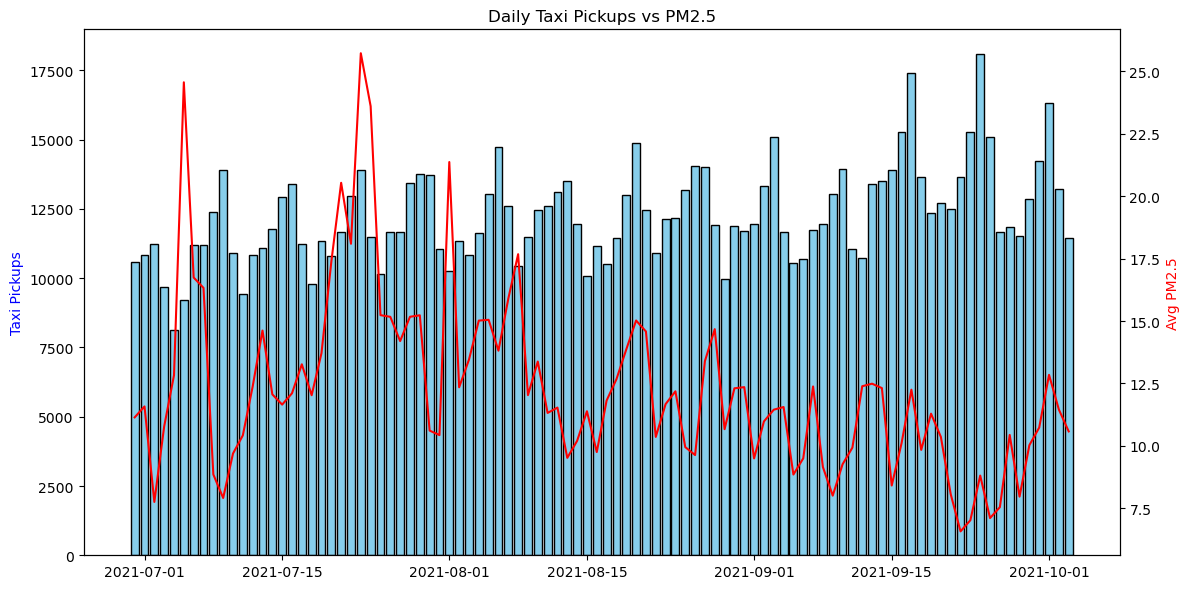

In [47]:
# Prepare AQ data
aq_df['datetime'] = pd.to_datetime(aq_df['ReadingDateTimeUTC'])
aq_df['date'] = aq_df['datetime'].dt.date
pm25_by_day = aq_df.groupby('date')['CalibratedPM25'].mean().reset_index()

# Prepare Taxi data (assuming pickup datetime column exists)
taxi_df['datetime'] = pd.to_datetime(taxi_df['Trip Start Timestamp'])  # adjust column name if needed
taxi_df['date'] = taxi_df['datetime'].dt.date
taxi_by_day = taxi_df.groupby('date').size().reset_index(name='taxi_pickups')

# Merge
temporal_join = pd.merge(pm25_by_day, taxi_by_day, on='date')

# Plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(temporal_join['date'], temporal_join['taxi_pickups'], color='skyblue', label='Taxi Pickups')
ax1.set_ylabel("Taxi Pickups", color='blue')
ax2 = ax1.twinx()
ax2.plot(temporal_join['date'], temporal_join['CalibratedPM25'], color='red', label='PM2.5')
ax2.set_ylabel("Avg PM2.5", color='red')

plt.title("Daily Taxi Pickups vs PM2.5")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\202973\AppData\Local\Temp\ipykernel_11388\3687678763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_geohashes['geometry'] = active_geohashes['geohash'].apply(geohash_to_polygon)


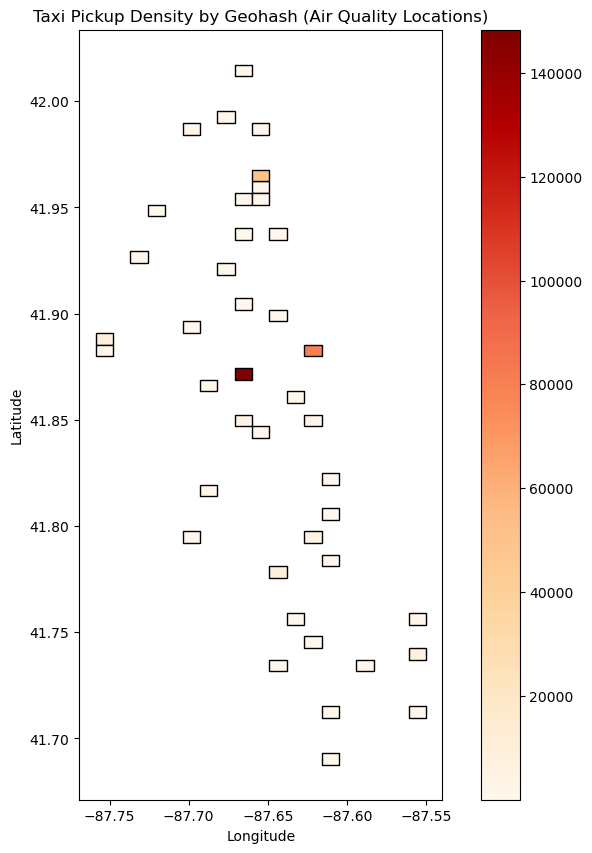

In [28]:
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt
import geohash2

# Step 1: Convert geohash to polygon
def geohash_to_polygon(gh):
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(gh)
    return box(lon - lon_err, lat - lat_err, lon + lon_err, lat + lat_err)

active_geohashes['geometry'] = active_geohashes['geohash'].apply(geohash_to_polygon)

# Step 2: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(active_geohashes, geometry='geometry', crs='EPSG:4326')

# Step 3: Plot
gdf.plot(column='taxi_pickup_count',
         cmap='OrRd',
         legend=True,
         edgecolor='black',
         figsize=(10, 10))

plt.title("Taxi Pickup Density by Geohash (Air Quality Locations)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


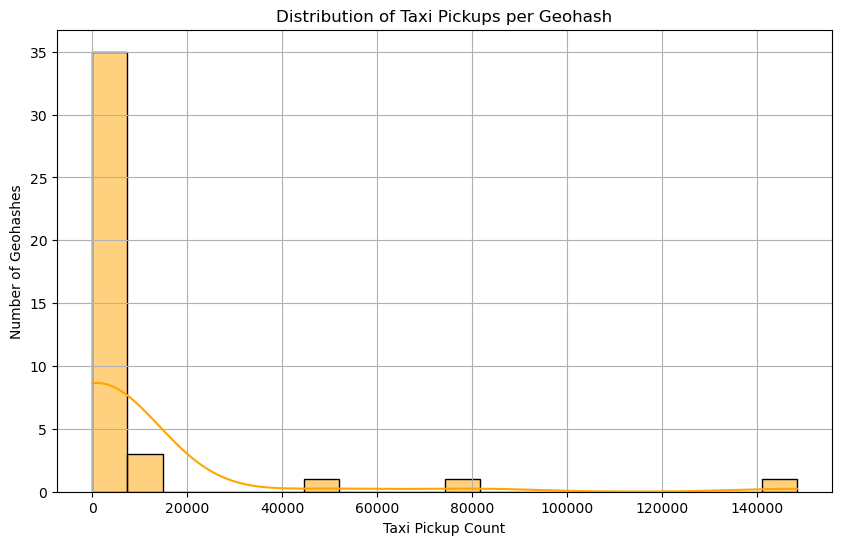

In [30]:
# Set up plot
plt.figure(figsize=(10, 6))
sns.histplot(data=active_geohashes, x='taxi_pickup_count', bins=20, kde=True, color='orange')

# Labels and title
plt.title("Distribution of Taxi Pickups per Geohash")
plt.xlabel("Taxi Pickup Count")
plt.ylabel("Number of Geohashes")
plt.grid(True)
plt.show()

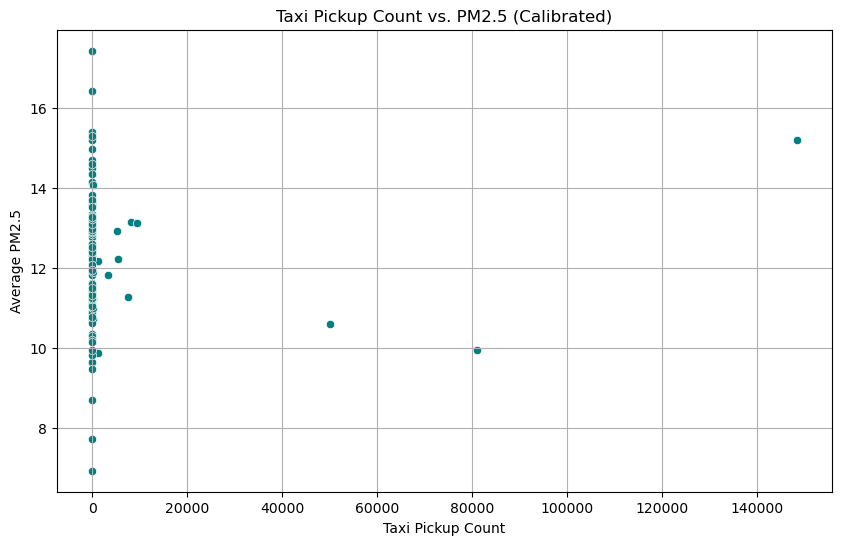

In [31]:
# Average pollution per geohash
pollution_avg = aq_df.groupby('geohash')['CalibratedPM25'].mean().reset_index()
scatter_df = geohash_summary.merge(pollution_avg, on='geohash')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_df,
    x='taxi_pickup_count',
    y='CalibratedPM25',
    color='teal'
)

plt.title("Taxi Pickup Count vs. PM2.5 (Calibrated)")
plt.xlabel("Taxi Pickup Count")
plt.ylabel("Average PM2.5")
plt.grid(True)
plt.show()


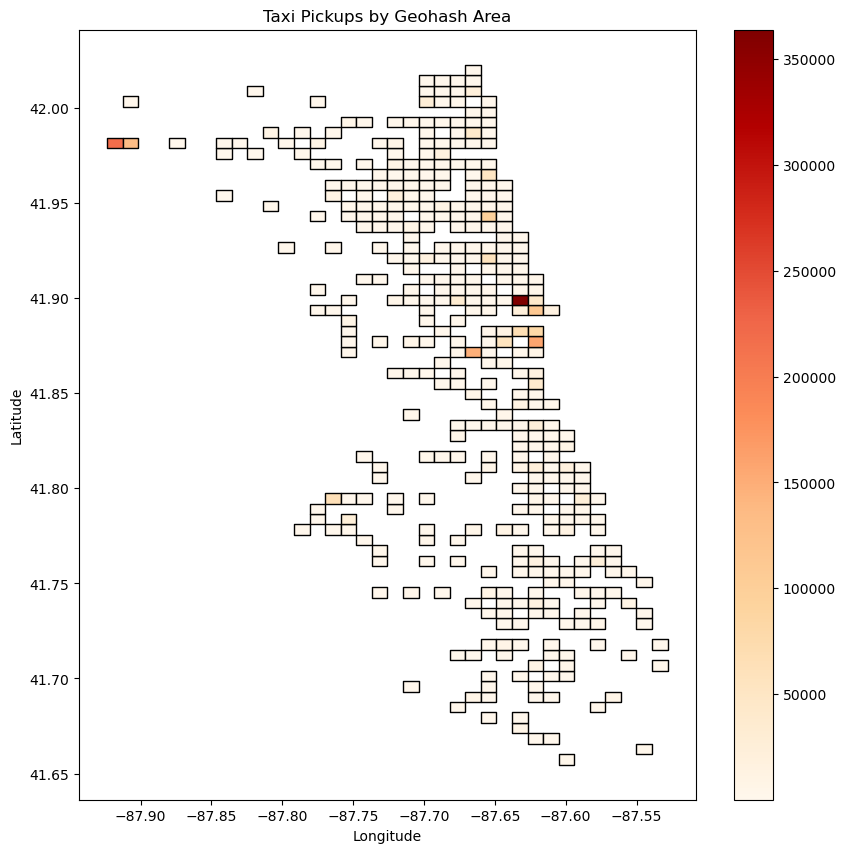

In [22]:
from shapely.geometry import box
# Step 1: Aggregate pickups by geohash (unique)
pickup_counts = taxi_df.groupby('geohash').size().reset_index(name='pickup_count')
pickup_counts.columns = ['geohash', 'pickup_count']

# Step 2: Convert geohashes to polygon geometries
def geohash_to_polygon(gh):
    lat, lon, lat_err, lon_err = geohash2.decode_exactly(gh)
    return box(lon - lon_err, lat - lat_err, lon + lon_err, lat + lat_err)

pickup_counts['geometry'] = pickup_counts['geohash'].apply(geohash_to_polygon)

# Step 3: Create GeoDataFrame
gdf = gpd.GeoDataFrame(pickup_counts, geometry='geometry', crs='EPSG:4326')

# Step 4: Plot
gdf.plot(column='pickup_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(10, 10))
plt.title("Taxi Pickups by Geohash Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [24]:
assert pickup_counts['geohash'].is_unique, "❌ Duplicate geohashes found!"


In [67]:
# 1. Aggregate AQ data by geohash
aq_grouped = aq_df.groupby("geohash").agg({
    "CalibratedPM25": "mean",
    "CalibratedO3": "mean",
    "CalibratedNO2": "mean",
    "CO": "mean"
}).reset_index()

# 2. Aggregate Taxi data by geohash
taxi_grouped = taxi_df.groupby("geohash").agg({
    "Trip Seconds": "mean",
    "Trip Miles": "mean",
    "Trip Start Timestamp": "count"
}).reset_index().rename(columns={"Trip Start Timestamp": "trip_count"})

# 3. Join by geohash (only areas with both AQ and taxi data)
joined_summary = pd.merge(taxi_grouped, aq_grouped, on="geohash", how="inner")

# 4. Inspect features ready for clustering
print(joined_summary.head())


Empty DataFrame
Columns: [geohash, Trip Seconds, Trip Miles, trip_count, CalibratedPM25, CalibratedO3, CalibratedNO2, CO]
Index: []


In [46]:
joined_summary

,geohash,Trip Seconds,Trip Miles,trip_count,CalibratedPM25,CalibratedO3,CalibratedNO2,CO


In [22]:
total_trips = joined_summary["trip_count"].sum()
print("🧾 Total number of trips across all geohashes:", total_trips)


🧾 Total number of trips across all geohashes: 321358


In [19]:
print("Taxi geohashes:", taxi_df["geohash"].nunique())
print("AQ geohashes:", aq_df["geohash"].nunique())


Taxi geohashes: 394
AQ geohashes: 105


In [20]:
print("Joined geohashes:", joined_summary["geohash"].nunique())


Joined geohashes: 41


cluster
 0    36
-1     5
Name: count, dtype: int64


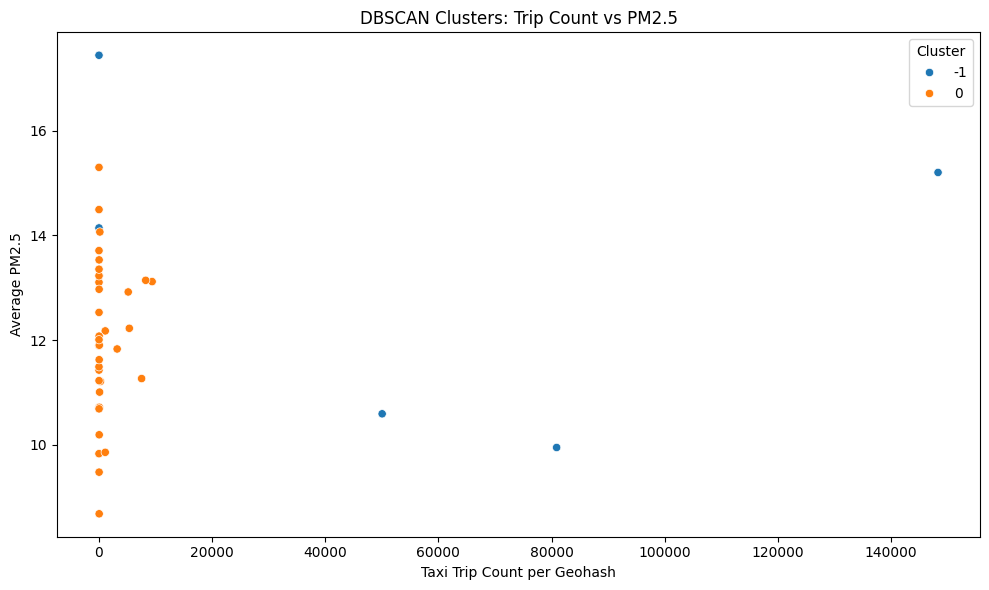

In [ ]:
# Step 1: Select relevant columns for clustering
# You can adjust features here based on what you want DBSCAN to consider
features = joined_summary[[
    "Trip Seconds",     # average trip duration
    "Trip Miles",       # average trip distance
    "trip_count",       # number of trips per geohash
    "CalibratedPM25"    # pollution value you're targeting
]]

# Step 2: Standardize features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Step 3: Run DBSCAN
db = DBSCAN(eps=1.0, min_samples=5)  # You can tune these values
joined_summary["cluster"] = db.fit_predict(scaled)

# Step 5: Optional - View how many geohashes in each cluster
print(joined_summary["cluster"].value_counts())

# Step 4: Visualize clusters (Trip Count vs PM2.5 as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=joined_summary,
    x="trip_count",
    y="CalibratedPM25",
    hue="cluster",
    palette="tab10"
)
plt.title("DBSCAN Clusters: Trip Count vs PM2.5")
plt.xlabel("Taxi Trip Count per Geohash")
plt.ylabel("Average PM2.5")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()




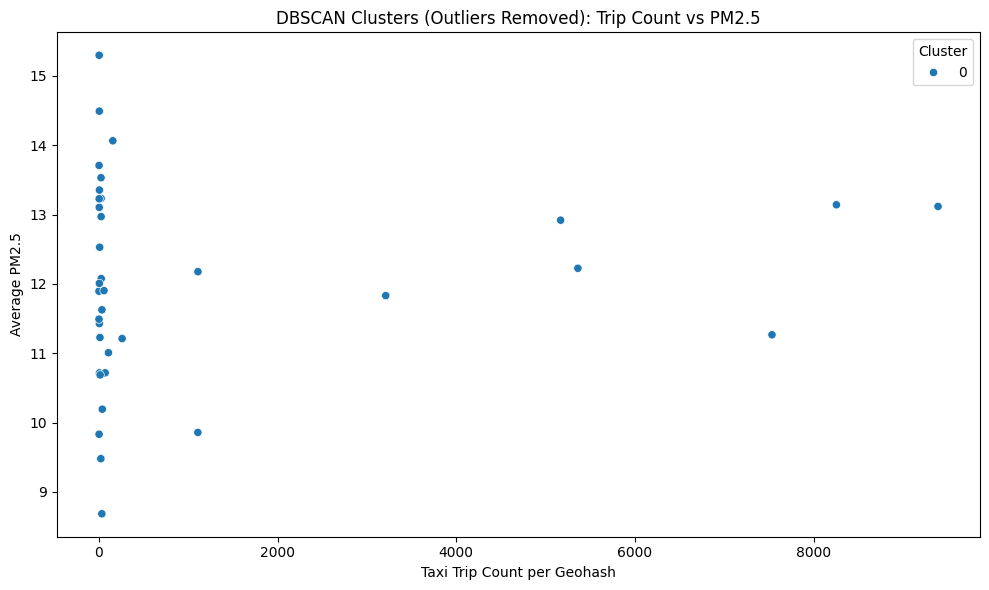

In [30]:
# Remove DBSCAN outliers (cluster -1)
cleaned = joined_summary[joined_summary["cluster"] != -1]

# Plot cleaned data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cleaned,
    x="trip_count",
    y="CalibratedPM25",
    hue="cluster",
    palette="tab10"
)
plt.title("DBSCAN Clusters (Outliers Removed): Trip Count vs PM2.5")
plt.xlabel("Taxi Trip Count per Geohash")
plt.ylabel("Average PM2.5")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
